# Credit Card

In [1]:
# import the required packages
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 

In [4]:
creditcard_df=pd.read_csv("C:/Users/ASUS/Desktop/credit_card.csv")

In [5]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# check the datatypes and null values in columns using the "info()"
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

 that we have null values in columns CREDIT_LIMIT and MINIMUM_PAYMENTS

In [7]:
# get more statistical insights using "describe()"
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Visualize and Explore Dataset

<AxesSubplot:>

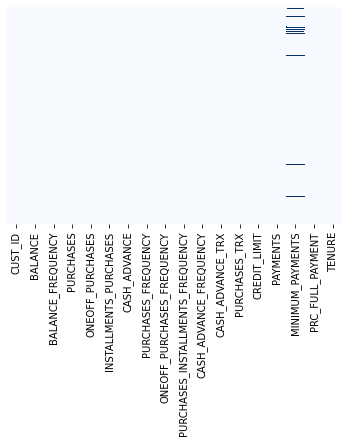

In [8]:
# lets revist the missing data
import seaborn as sns
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

The above helps for the "MINIMUM_PAYMENTS" column, but what about the other missing data columns, they not very much visible. Lets try a different method

In [9]:
# This gives more clear sense of missing data in a tablular form
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# lets fill up the missing elements with mean of the "MINIMUM_PAYMENTS"
# But first lets try out the parts of the code before fully write it in single line
# The below gives the True/False against each row based on "MINIMUM_PAYMENTS" is null(TRUE) or not(FALSE)
creditcard_df['MINIMUM_PAYMENTS'].isnull() == True

0       False
1       False
2       False
3        True
4       False
        ...  
8945    False
8946     True
8947    False
8948    False
8949    False
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: bool

In [11]:
# In order to replace the null values, we have to identity the locations of these row
# the below gives only the rows where "MINIMUM_PAYMENTS" are missing values or where the above code gave FALSE
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS']

3      NaN
45     NaN
47     NaN
54     NaN
55     NaN
        ..
8919   NaN
8929   NaN
8935   NaN
8944   NaN
8946   NaN
Name: MINIMUM_PAYMENTS, Length: 313, dtype: float64

In [12]:
# Finally, lets replace the above row values with mean()
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [13]:
#let's check again for any missing value
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

 Great, no missing values in "MINIMUM_PAYMENTS" now but we still have a missing data for "CREDIT_LIMIT" column

In [14]:
# Lets do the same again for the "CREDIT_LIMIT" column
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [15]:
# Probably the last check for missing values
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Great, no missing values anywhere

In [16]:
# lets check if we have any duplicate rows/entries in the dataset
creditcard_df.duplicated().sum()

0

In [17]:
# lets drop the column "CUST_ID" as it is just an ID and not a feature. In 99% cases, we drop the ID unless they can be used to derive otehr features
creditcard_df.drop('CUST_ID', axis=1, inplace=True)
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
# lets check out the column names and count
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [19]:
n=len(creditcard_df.columns)
n

17

In [20]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Visualize the data.

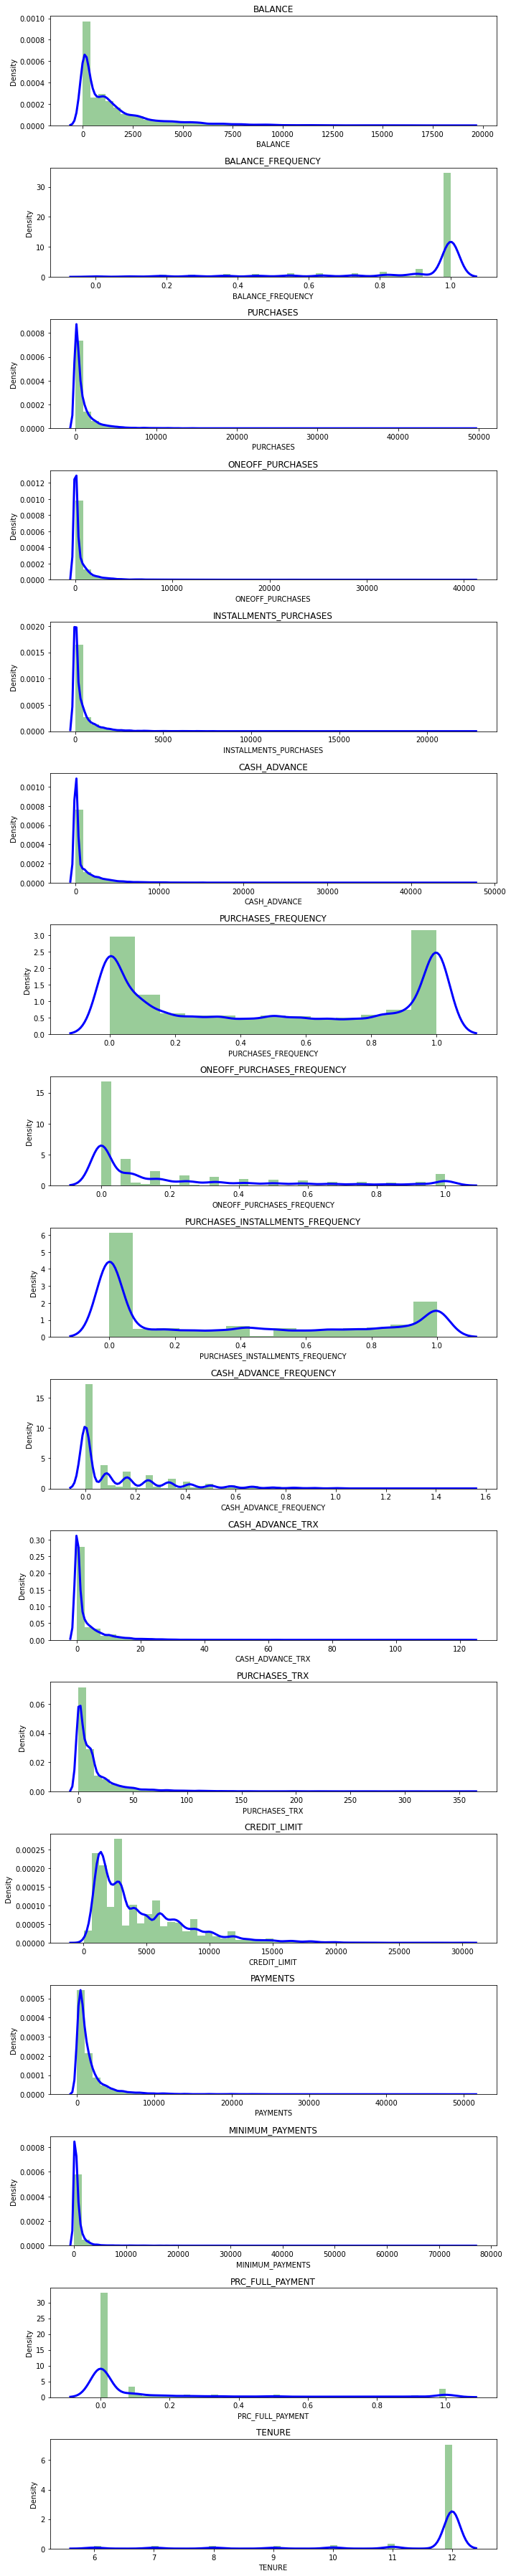

In [21]:
# distplot with KDE
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={'color':'b', 'lw':3, 'label':'KDE', 'bw':0.1}, hist_kws={'color':'g'})
    #sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={'color':'b', 'lw':3, 'label':'KDE'})
    plt.title(creditcard_df.columns[i])
    
plt.tight_layout()

<AxesSubplot:>

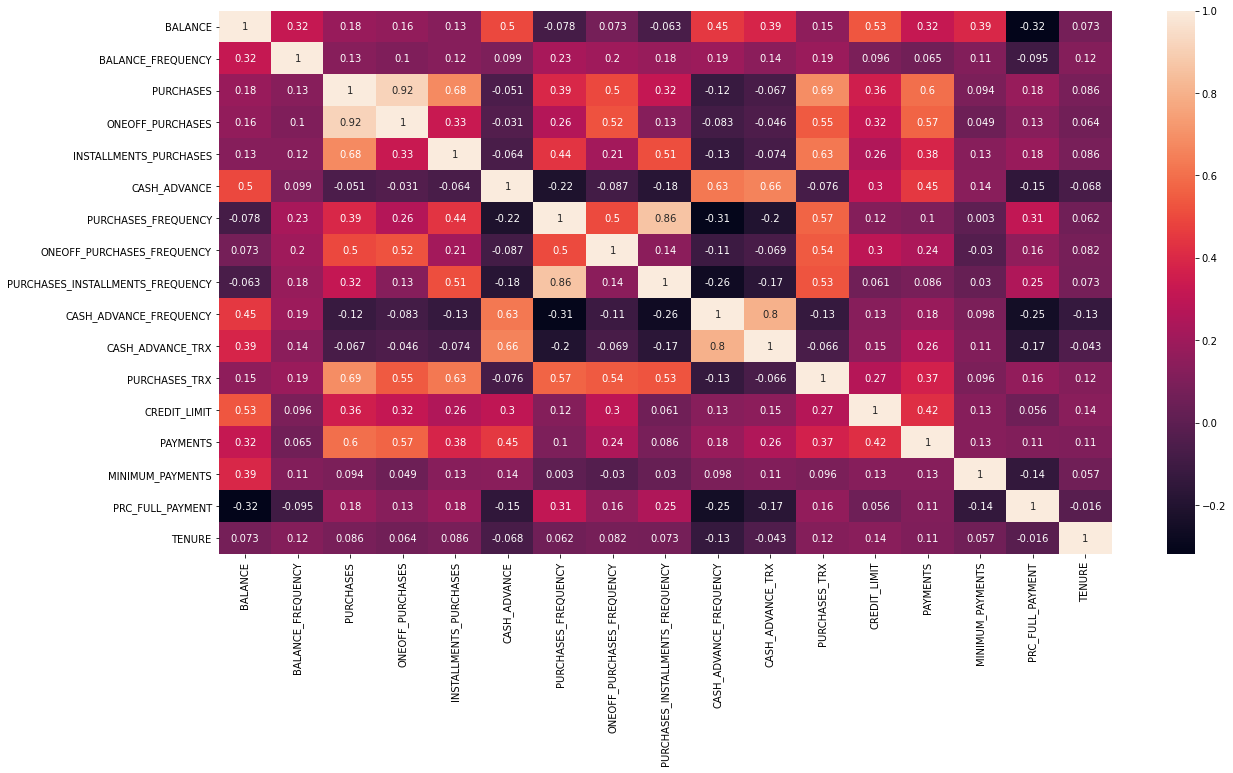

In [22]:
# Correlation is used to see the relation between features.
# Positive correlation mean the features are direcltly proportional and negetive means inversely proportional
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True)

Implement Elbow Method

In [23]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled.shape

(8950, 17)

In [24]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

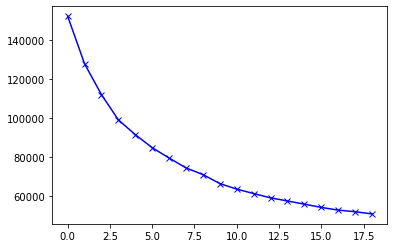

In [25]:
scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1,'bx-')

Apply K-Means method

In [26]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [27]:
kmeans.cluster_centers_.shape

(7, 17)

In [28]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.367555,0.330562,-0.039840,-0.234950,0.337266,-0.368099,0.980609,-0.357343,1.173200,-0.477687,-0.362424,0.173897,-0.278236,-0.221810,-0.015735,0.307237,0.252156
1,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
2,1.668279,0.396119,-0.205865,-0.150344,-0.210643,1.992374,-0.457867,-0.191366,-0.405715,1.911539,1.924524,-0.244012,1.007532,0.821075,0.553156,-0.394693,0.069155
3,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
4,-0.701828,-2.136168,-0.307232,-0.230688,-0.302515,-0.320818,-0.547978,-0.429080,-0.441452,-0.521898,-0.376692,-0.416805,-0.170933,-0.192057,-0.257326,0.297891,0.202040
5,0.007572,0.402578,-0.343831,-0.225095,-0.399336,-0.104339,-0.810055,-0.336035,-0.752333,0.084585,-0.041876,-0.464562,-0.301248,-0.248932,-0.015896,-0.452870,0.271810
6,0.128548,0.429498,0.938714,0.895530,0.574324,-0.308630,1.092909,1.872044,0.535645,-0.408962,-0.318910,1.197816,0.701770,0.386911,-0.056639,0.455672,0.307684


In [29]:
# To understand the data better, perform the inverse transformation
cluster_centers = np.round(scaler.inverse_transform(cluster_centers),4)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,799.4397,0.9556,918.0855,202.4689,716.0535,206.9511,0.8839,0.0959,0.8307,0.0396,0.7756,19.0323,3482.1126,1091.0269,827.5376,0.2436,11.8548
1,866.1483,0.7948,395.3117,245.5856,150.2031,1116.3088,0.4106,0.1211,0.2727,0.1960,3.2337,5.1256,2468.2265,602.1041,376.2479,0.1575,7.2432
2,5036.8574,0.9711,563.3701,342.8979,220.5862,5156.9719,0.3066,0.1454,0.2032,0.5177,16.3823,8.6446,8160.2629,4110.0752,2153.3124,0.0383,11.6099
3,4541.3939,0.9766,15777.3114,10689.0278,5088.2836,1060.1907,0.9281,0.7631,0.7815,0.0853,2.9884,130.1977,12493.0233,15581.4968,3383.3041,0.3947,11.9651
4,103.6799,0.3712,346.7998,209.5431,137.5068,306.1006,0.2704,0.0745,0.1890,0.0307,0.6782,4.3496,3872.5269,1177.1583,264.5202,0.2408,11.7877
5,1580.2357,0.9726,268.6055,218.8261,49.9535,760.0666,0.1652,0.1022,0.0654,0.1521,2.9631,3.1626,3398.3873,1012.5102,827.1618,0.0213,11.8811
6,1832.0361,0.9790,3008.7819,2078.8334,930.4213,331.6606,0.9290,0.7609,0.5773,0.0533,1.0725,44.4831,7047.7756,2853.2129,732.2113,0.2870,11.9291


In [30]:
labels

array([5, 2, 6, ..., 1, 1, 1])

In [31]:
labels.shape

(8950,)

In [32]:
labels.max()

6

In [33]:
labels.min()

0

In [34]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans # this should be same as labels???

array([3, 2, 6, ..., 0, 3, 1])

In [35]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


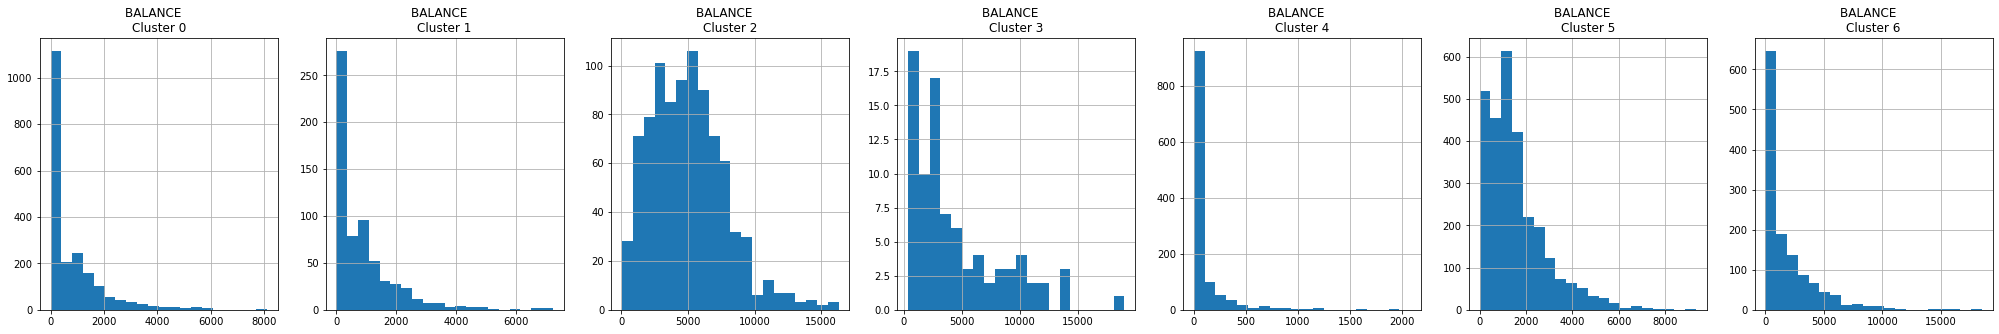

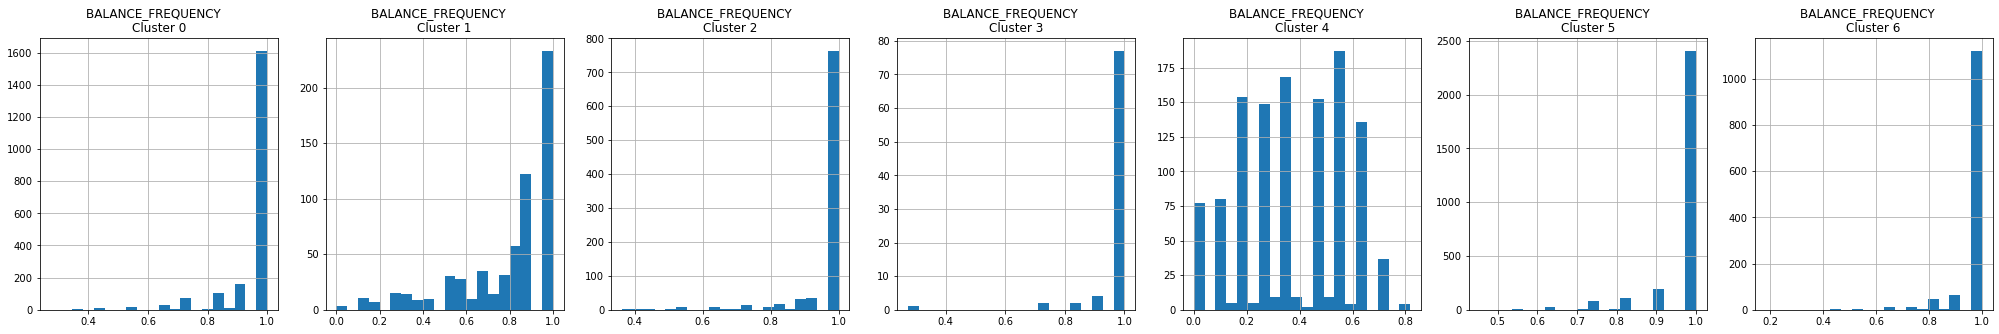

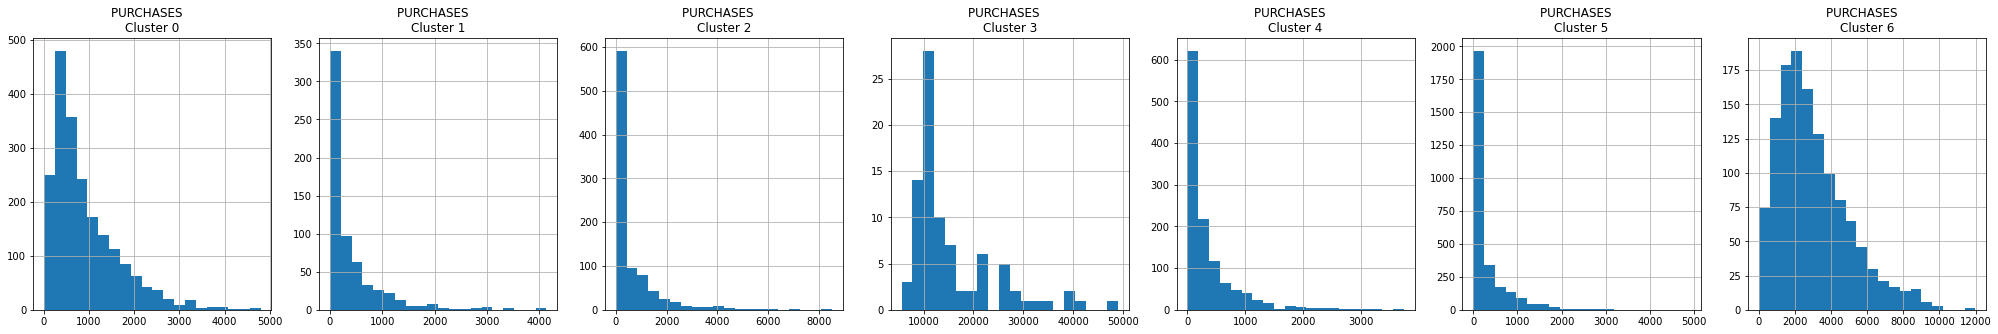

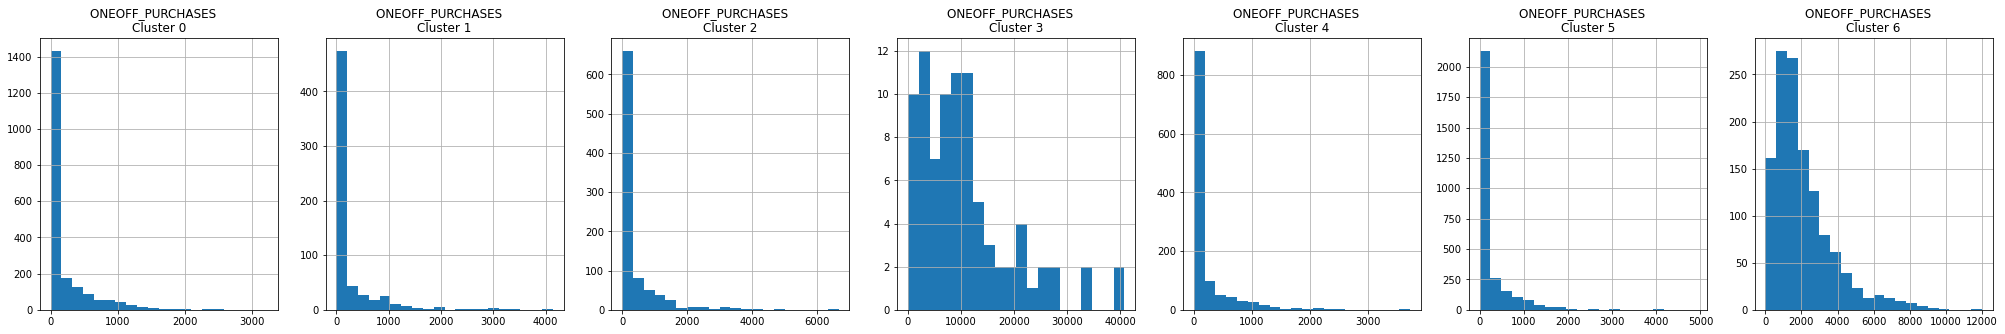

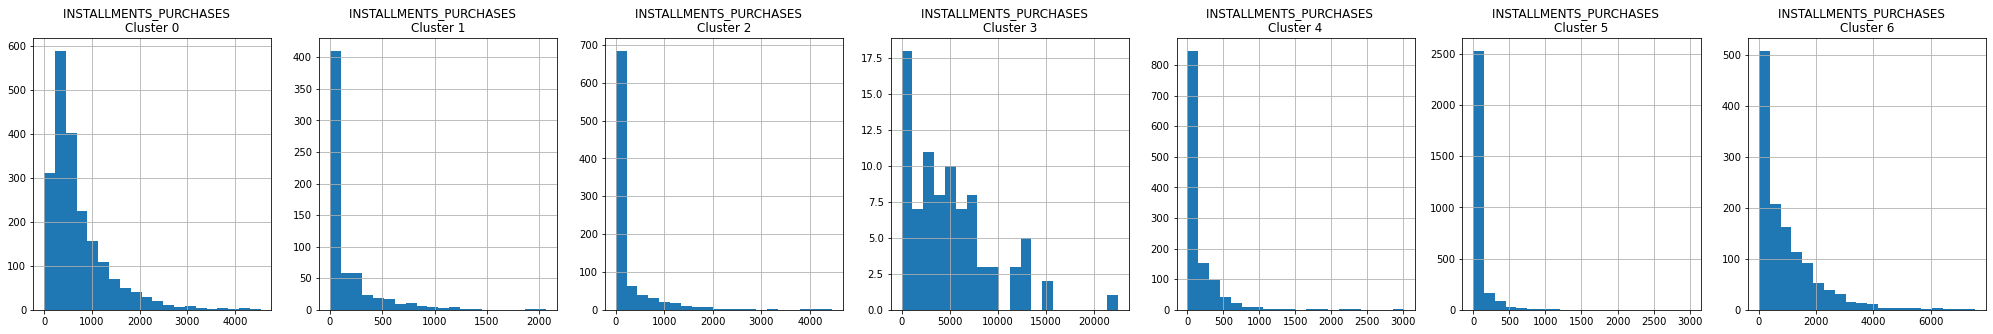

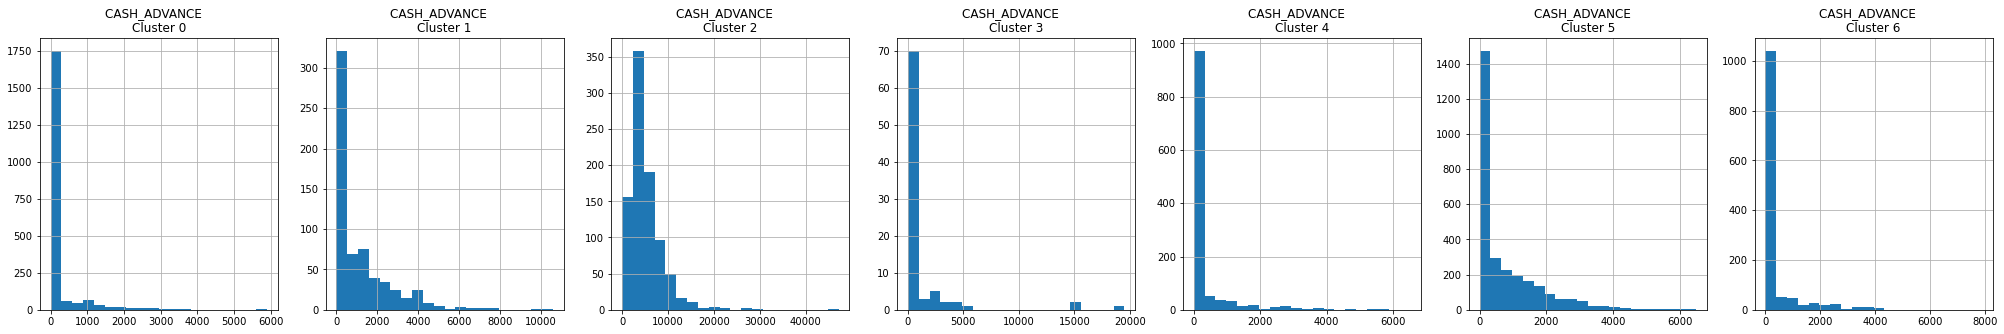

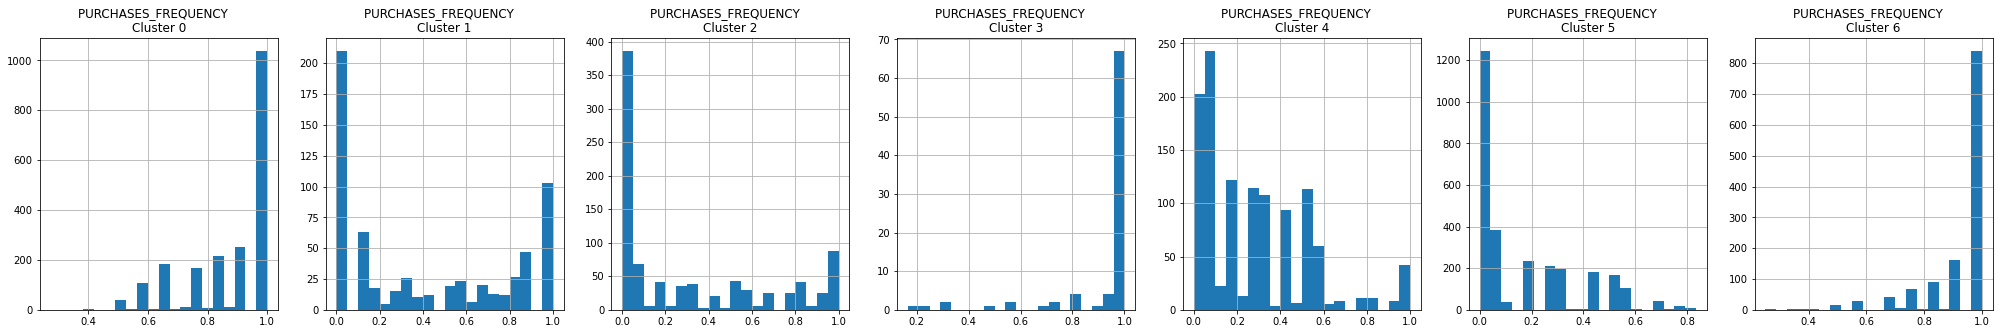

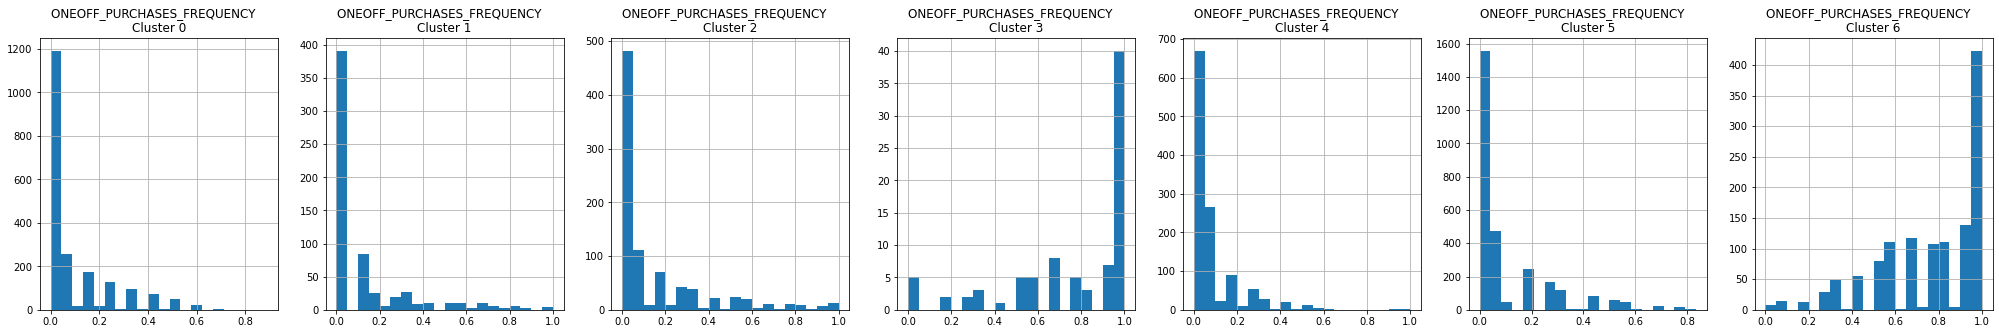

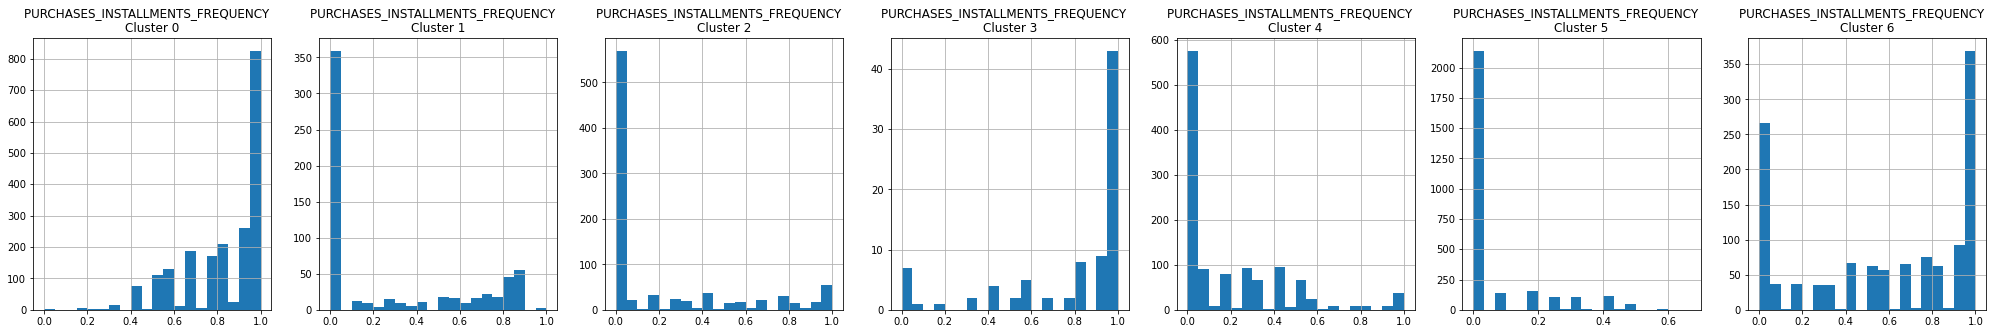

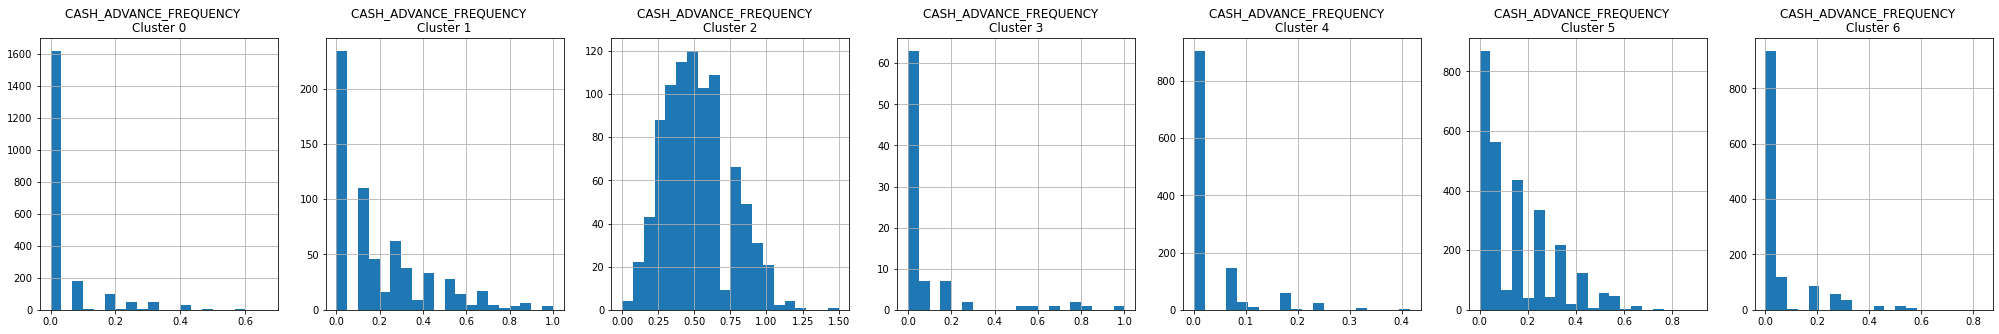

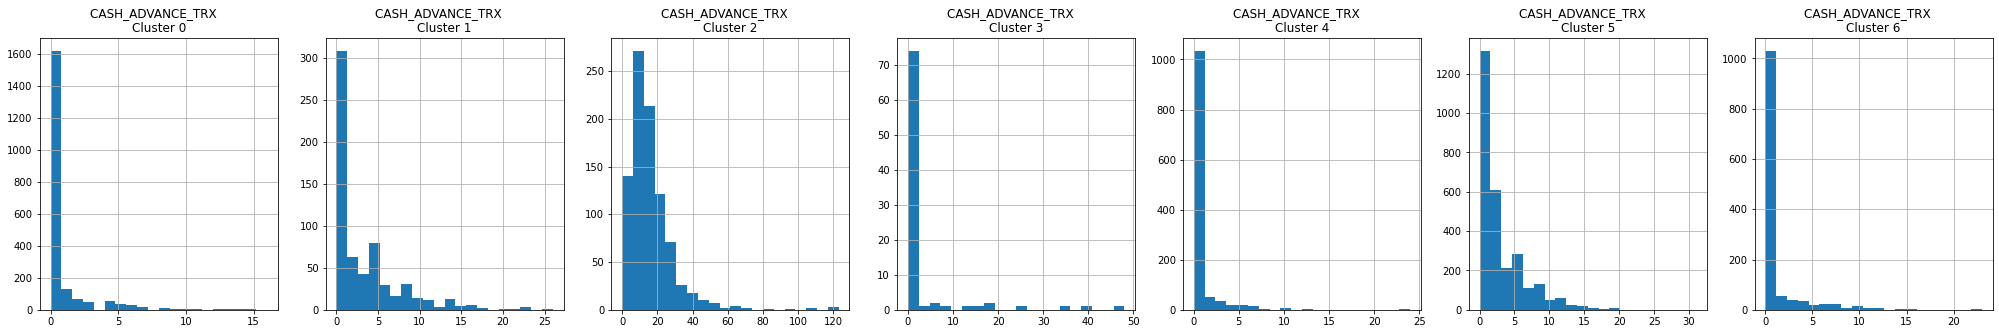

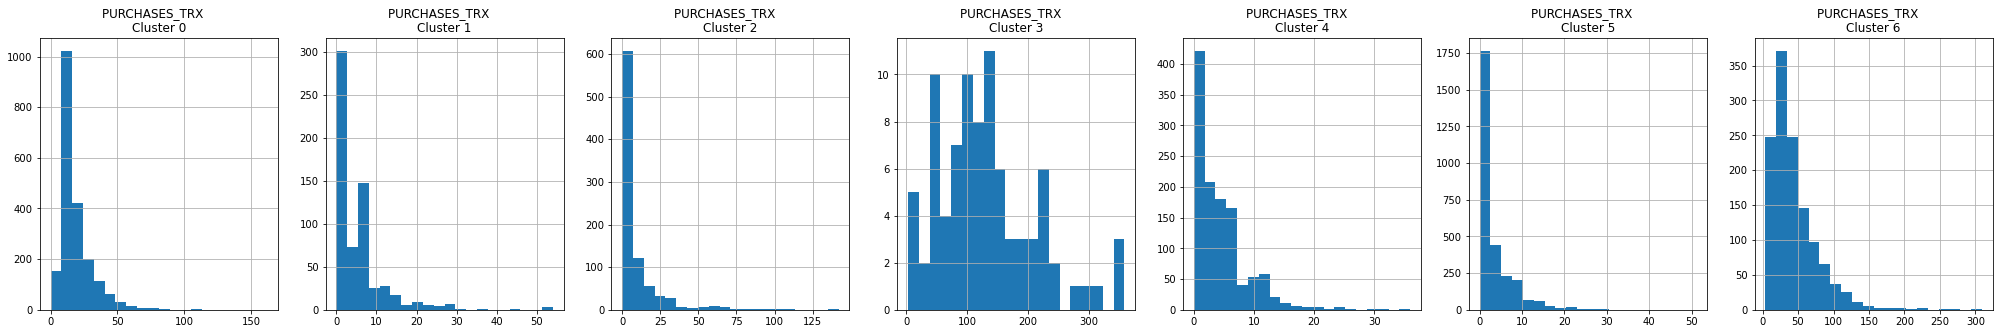

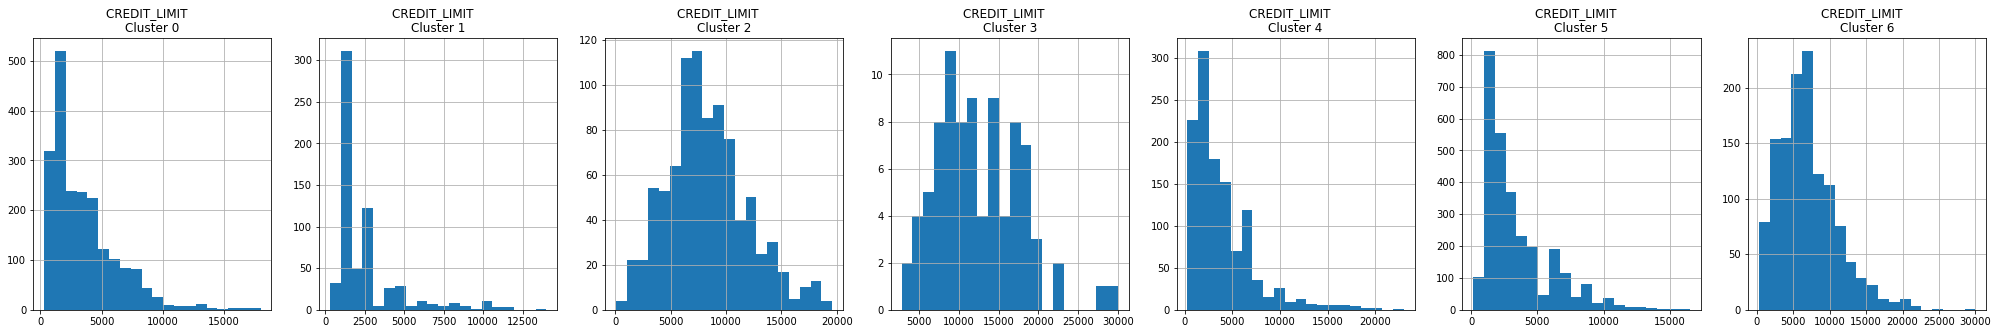

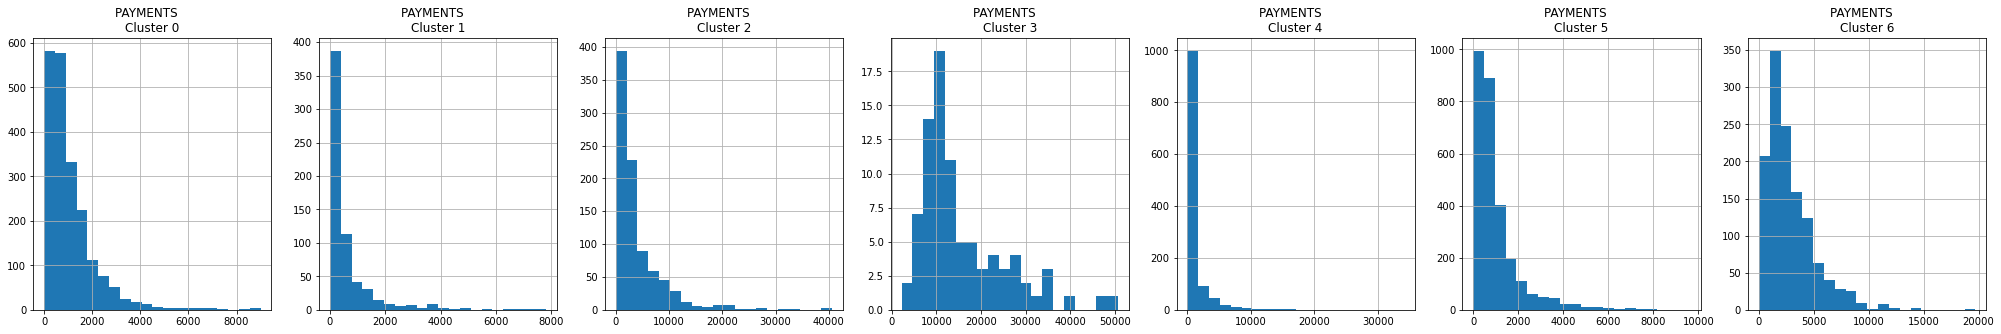

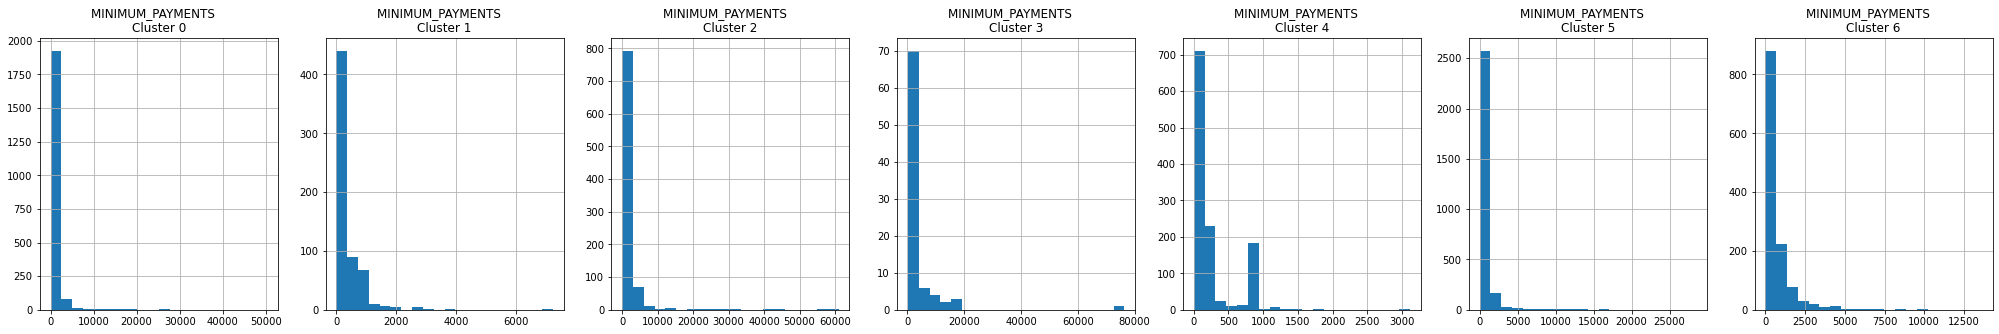

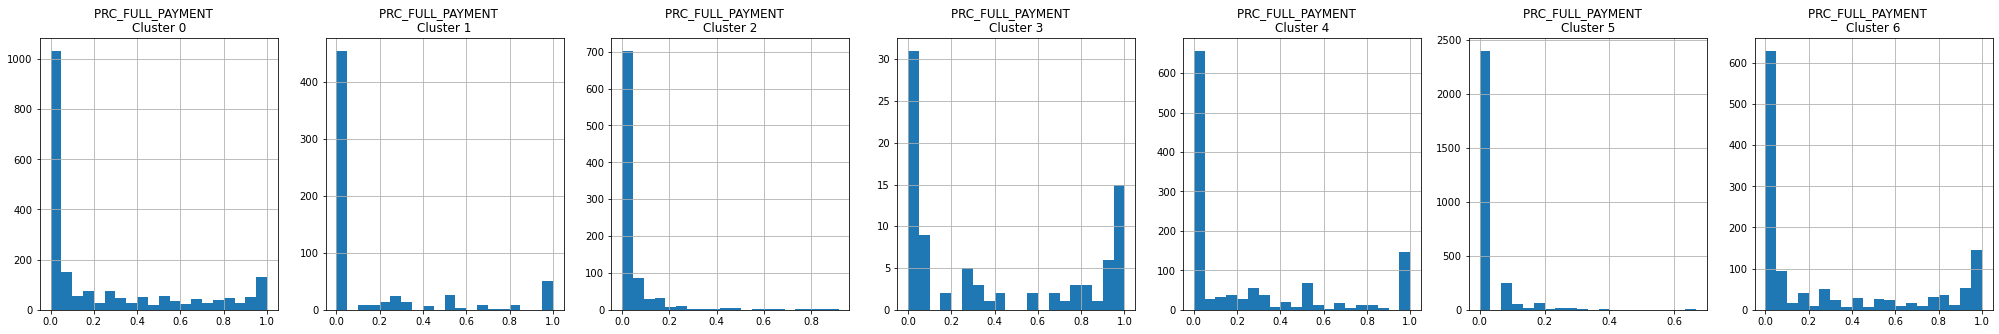

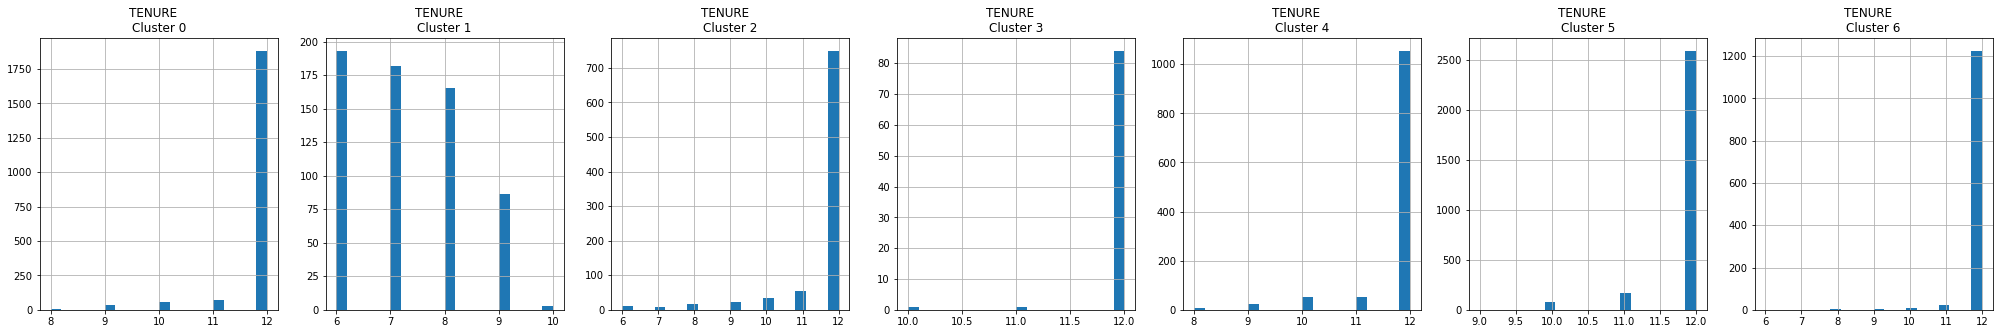

In [36]:
# plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}   \nCluster {}'.format(i,j))
        
plt.show()

Principal Component Analysis (PCA)

In [40]:
# Obtain the principal component
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221997, -1.0764502 ],
       [-1.13829352,  2.50649649],
       [ 0.96968372, -0.38352501],
       ...,
       [-0.92620382, -1.81079075],
       [-2.33655214, -0.65797792],
       [-0.55642298, -0.400474  ]])

In [41]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138294,2.506496
2,0.969684,-0.383525
3,-0.873627,0.043168
4,-1.599434,-0.688582


In [42]:
# concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076450,5
1,-1.138294,2.506496,2
2,0.969684,-0.383525,6
3,-0.873627,0.043168,5
4,-1.599434,-0.688582,5


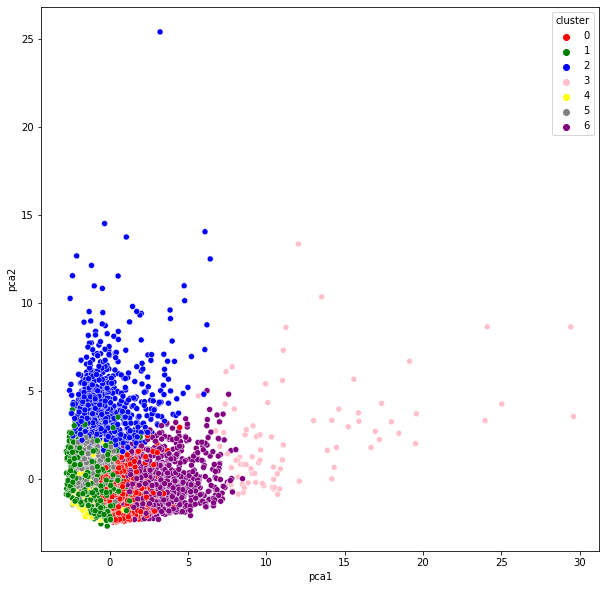

In [43]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red','green','blue','pink','yellow','gray','purple'])

silhouette analysis on KMeans clustering

Silhouette Coefficient Method:

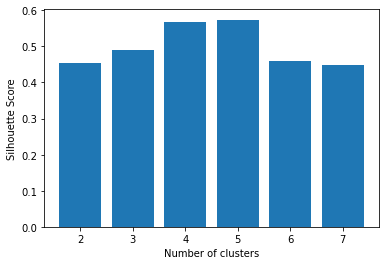

In [45]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(pca_df, KMeans(n_clusters = n_cluster).fit_predict(pca_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 